In [108]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm



In [109]:
from scipy.misc import derivative

In [110]:
def function(x):
    return 10*np.sin(x) - np.sin(1/x) + 5*np.cos(2*x) + 1/2*np.sin(np.exp(x)) + x

In [105]:
x = np.linspace(-7,5,10000)
X, Y = x, function(x)

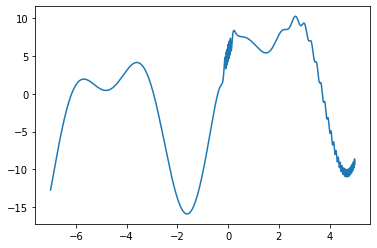

In [106]:
plt.plot(X, Y)

The following algorithm is supposed to iteratively find the minimum of a function. 

What problem does it have?

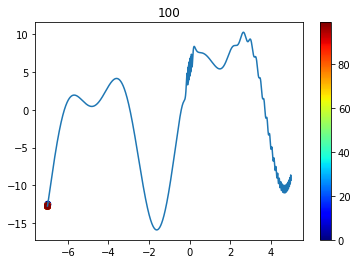

In [107]:
x = X
index = np.random.randint(0, len(x)) # randomly select an index to sample a point
point = x[index] # sample a point to start
derivative_in_point = derivative(function, point)
it = 0 # current iteration
max_it = 100 # set the max number of iterations to avoid infinite loops
points = [] # list of the points we have inspected
threshold = 0.01 # instead for waiting till we reach the 0 of the derivative, put a threshold
while np.abs(derivative_in_point)> 0.01 and it<max_it: 
    if derivative_in_point < 0: # the slope is negative
        x = x[index:] # since the slope is negative, the local minimum should be on the right
        index = np.random.randint(0, len(x)) # randomly select an index
        point = x[index] # sample the next point in the new interval
        points.append(point) # store for later
        derivative_in_point = derivative(function, point) # compute the derivative in the new point
    else:
        x = x[0:index+1] # the slope is positive, so the minimum should be on the left
        index = np.random.randint(0, len(x))
        point = x[index]
        points.append(point)
        derivative_in_point = derivative(function, point)
    it +=1
plt.figure()
plt.plot(X,Y)
plt.scatter(np.array(points), function(np.array(points)), c=range(len(points)), cmap=cm.jet)
plt.title(str(it))
plt.colorbar()


## Exercise

1. Can you make the algorithm above to be implemented into a fuction `gradient_descent(function, X, max_it)`?

2. Run the experiment multiple times: do you notice any important difference at each iteration?

In [111]:
def gradient_descent(function, X, max_it):
    x = X
    Y = function(X)
    index = np.random.randint(0, len(x)) # randomly select an index to sample a point
    point = x[index] # sample a point to start
    derivative_in_point = derivative(function, point)
    it = 0 # current iteration
    # max_it = 100 # set the max number of iterations to avoid infinite loops
    points = [] # list of the points we have inspected
    threshold = 0.01 # instead for waiting till we reach the 0 of the derivative, put a threshold
    while np.abs(derivative_in_point)> 0.01 and it<max_it: 
        if derivative_in_point < 0: # the slope is negative
            x = x[index:] # since the slope is negative, the local minimum should be on the right
            index = np.random.randint(0, len(x)) # randomly select an index
            point = x[index] # sample the next point in the new interval
            points.append(point) # store for later
            derivative_in_point = derivative(function, point) # compute the derivative in the new point
        else:
            x = x[0:index+1] # the slope is positive, so the minimum should be on the left
            index = np.random.randint(0, len(x))
            point = x[index]
            points.append(point)
            derivative_in_point = derivative(function, point)
        it +=1
    plt.figure()
    plt.plot(X,Y)
    plt.scatter(np.array(points), function(np.array(points)), c=range(len(points)), cmap=cm.jet)
    plt.title(str(it))
    plt.colorbar()


    

In [112]:
x = np.linspace(-7,5,10000)

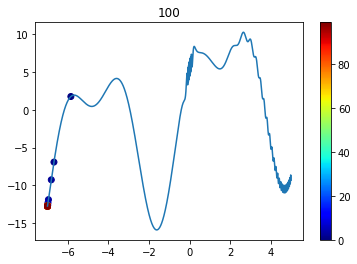

In [113]:
gradient_descent(function, X, 100)

## Integral

Scipy library also offers the possibility to compute the integral of a function.

In addition, the method `plt.fill_between(section, function(section)` colors the area under the curve of a generic function. 

Search the documentation of both and compute the area under the curve of the functions in the given intervals of the following exercises and plot them.



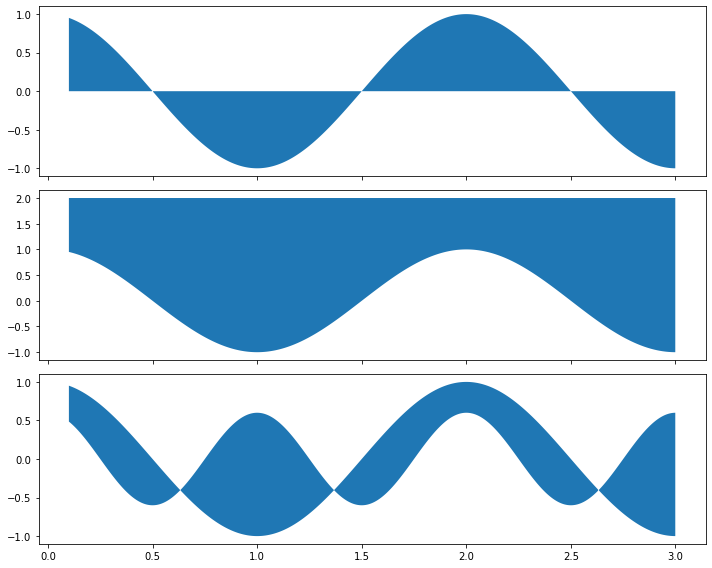

In [16]:
x = np.arange(0.1, 3, 0.001)
y1 = np.cos(np.pi*x)
y2 = 0.6*np.cos(2*np.pi*x)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize = (10,8))

ax1.fill_between(x,y1)

ax2.fill_between(x, y1, 2)

ax3.fill_between(x, y1, y2)
fig.tight_layout()


### Example

interval = \[2,5\]

Function f(x) = x


In [18]:
from scipy import integrate
a, b = [2, 5]
def f(x):
    return x

result = integrate.quad(f, a, b)
result

(10.5, 1.1657341758564144e-13)

The return value is a tuple, with the first element holding the estimated value of the integral and the second element holding an upper bound on the error.

More in https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html .

In [19]:
area_under_the_curve = result[0]

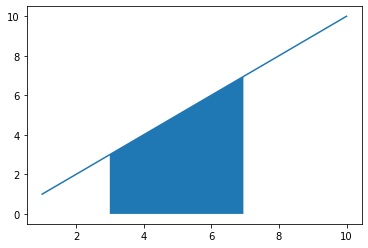

In [24]:
x = np.linspace(1,10, 100)
section = np.arange(3, 7, 1/20)
plt.plot(x, f(x))
plt.fill_between(section,f(section))


1. interval = \[2,5\]

Function f(x) = 5

Compare the result computing the area by hand. Does it make sense?

Be careful: defining a constant function, you may end up with a single number instead of an array of the same size of the input. For this, I recommend to put in your function `constant_value*np.ones_like(x)`.

In [55]:
a, b = [2,5]
def constant_f(x):
    return 5*np.ones_like(x)    
result1 = integrate.quad(constant_f, a, b)
result1

(15.0, 1.6653345369377348e-13)

In [56]:
area_under_the_curve = result1[0]

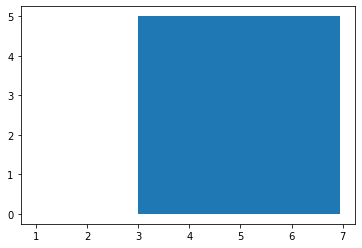

In [60]:
x = np.ones_like(x)
section1 = np.arange(3,7, 1/20)
plt.plot(x, constant_f(x))
plt.fill_between(section1,constant_f(section1))

2. interval = \[-1,1\]

Function f(x) = 1/x

In [88]:
a, b = [-1,1]
def over_f(x):
    return 1/(x+1e-9)

result2 = integrate.quad(over_f, a, b)
result2

(1.999999388324862e-09, 2.1094235093869616e-15)

In [89]:
area_under_the_curve = sum_result[0]

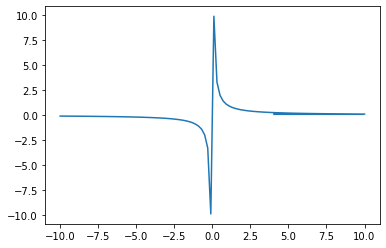

In [98]:
x = np.linspace(-10,10,100)
section2 = np.arange(4,10,1/20)
plt.plot(x, over_f(x))
plt.fill_between(section2,over_f(section2))

2. interval = \[-pi,pi\]

Function f(x) = sin(x)

In [61]:
a, b = [-np.pi,np.pi]
def sin_f(x):
    return np.sin(x)
result4 = integrate.quad(sin_f, a, b)
result4    

(0.0, 4.3998892617846e-14)

In [73]:
area_under_the_curve = result[0]


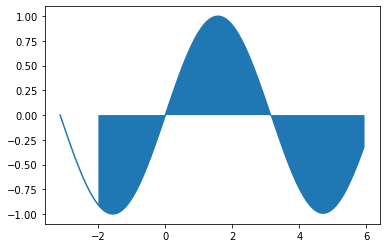

In [100]:
x = np.linspace(-np.pi,np.pi,100)
section3 = np.arange(-2,6,1/20)
plt.plot(x, sin_f(x))
plt.fill_between(section3, sin_f(section3))

3. interval = \[-pi,pi\]

Function f(x) = cos(x)


In [62]:
a, b = [-np.pi,np.pi]
def cos_f(x):
    return np.cos(x)
result5 = integrate.quad(cos_f, a, b)
result5    

(2.615901373506474e-16, 4.471737093238828e-14)

In [77]:
area_under_the_curve = result5[0]


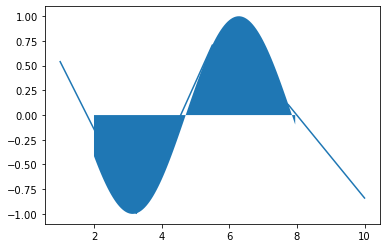

In [93]:
x = np.linspace(1,10, 5)
section4 = np.arange(2, 8, 1/20)
plt.plot(x,cos_f(x))
plt.fill_between(section4, cos_f(section4))

2. interval = \[-pi,pi\]

Function f(x) = sin(x) - cos(2x)

In [63]:
a, b = [-np.pi, np.pi]
def sincos_f(x):
    return np.sin(x)-np.cos(x)
result6 = integrate.quad(sincos_f, a, b)
result6    

(-2.615901373506474e-16, 6.304915998800247e-14)

In [84]:
area_under_the_curve = result6[0]

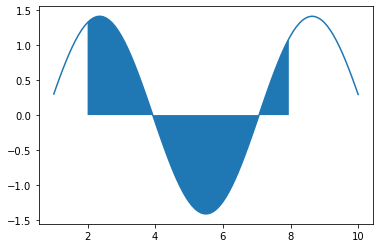

In [94]:
x = np.linspace(1,10,100)
section5 = np.arange(2,8,1/20)
plt.plot(x,sincos_f(x))
plt.fill_between(section5, sincos_f(section5))
